In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import svm
import scipy.optimize
import scipy.io


In [89]:
df = '/home/balerion/Desktop/leetcode_Ai/Ai/Andrew-NG-Notes/Machine Learning notebooks By Andrew NG/ex6/data/ex6data1.mat'
mat = scipy.io.loadmat(df)
# print(mat)

X , y = mat['X'] , mat['y']

pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

# l = len(pos) + len(neg)

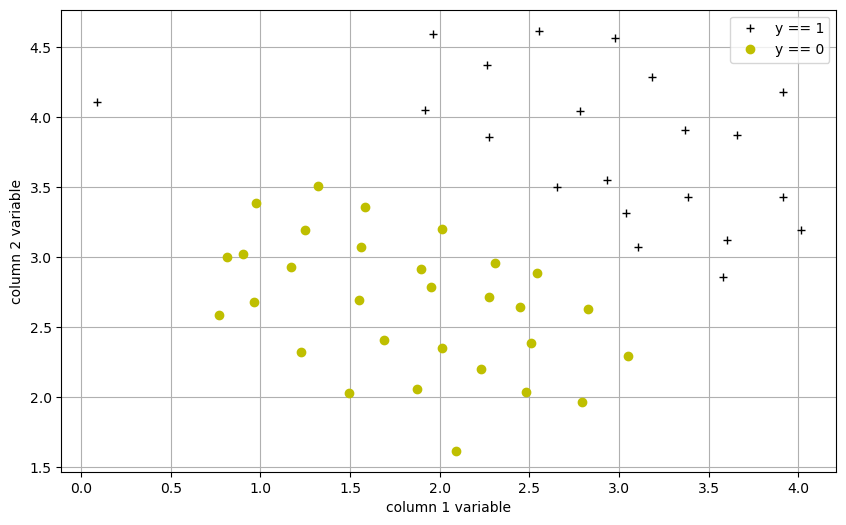

In [90]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0]  ,pos[:,1] , 'k+' , label = "y == 1")
    plt.plot(neg[:,0] , neg[:,1] , 'yo' , label = "y == 0")
    plt.xlabel("column 1 variable")
    plt.ylabel("column 2 variable")
    plt.grid(True)
    plt.legend()
    
plotData()

In [91]:
def plotBoundary(my_svm, xmin, xmax, ymin, ymax):
    xvals = np.linspace(xmin, xmax, 100)
    yvals = np.linspace(ymin, ymax, 100)
    zvals = np.zeros((len(xvals), len(yvals)))
    
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = float(my_svm.predict(np.array([xvals[i], yvals[j]]).reshape(1, -1)))
    
    zvals = zvals.transpose()
    u, v = np.meshgrid(xvals, yvals)
    plt.contour(u, v, zvals, levels=[0], linewidths=1.0, colors='b')
    plt.title("Decision Boundary")

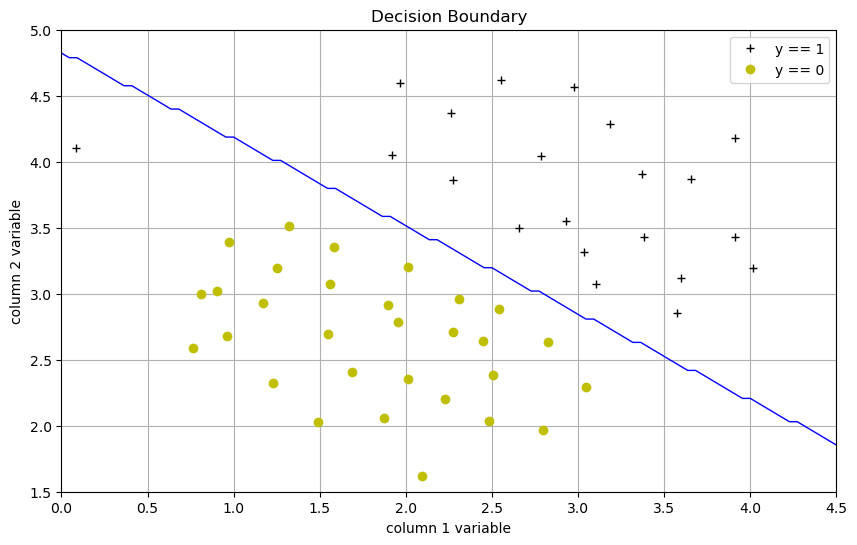

In [92]:
l_svm = svm.SVC(kernel='linear' , C=1)

l_svm.fit(X , y.flatten())


plotData()
plotBoundary(l_svm ,0.,4.5,1.5,5 )



### *Using in-built kernal*

*we need sigma and gamma value.*

* gamma = 1 / 2 * (sigma ** 2)

In [93]:
df = '/home/balerion/Desktop/leetcode_Ai/Ai/Andrew-NG-Notes/Machine Learning notebooks By Andrew NG/ex6/data/ex6data2.mat'
mat = scipy.io.loadmat(df)
# print(mat)

X , y = mat['X'] , mat['y']

pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

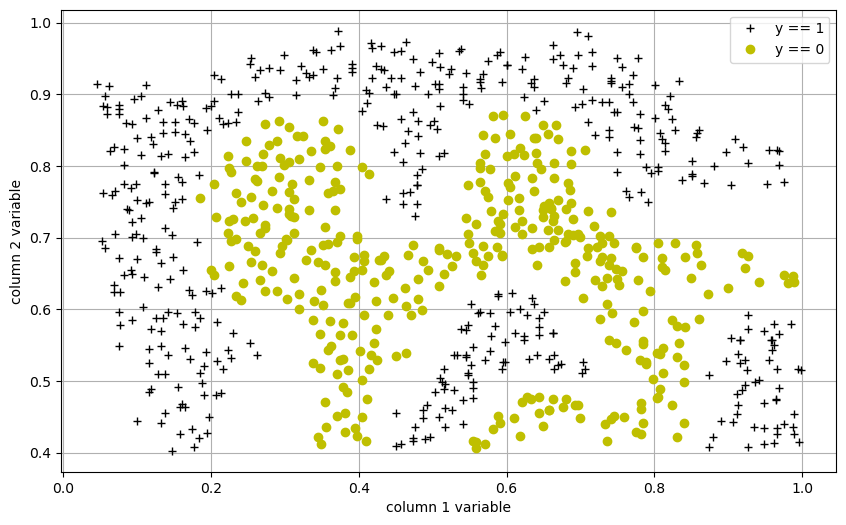

In [94]:
plotData()

/home/balerion/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


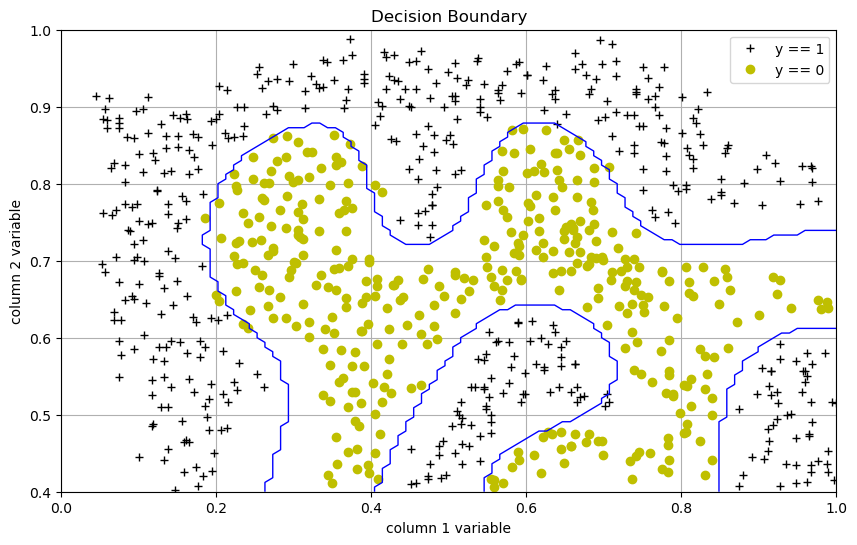

In [95]:
sigma = 0.1
gamma = 0.5*np.power(sigma , -2)

gauss_kernal = svm.SVC(C = 1 , kernel='rbf' , gamma=gamma)

gauss_kernal.fit(X,y)

plotData()
plotBoundary(gauss_kernal , 0 , 1 , 0.4 , 1)

### *Finding best sigma and C value pair*

In [96]:
df = '/home/balerion/Desktop/leetcode_Ai/Ai/Andrew-NG-Notes/Machine Learning notebooks By Andrew NG/ex6/data/ex6data3.mat'
mat = scipy.io.loadmat(df)
# print(mat)

X , y = mat['X'] , mat['y']
xvals , yvals = mat['Xval']  ,mat['yval']

pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

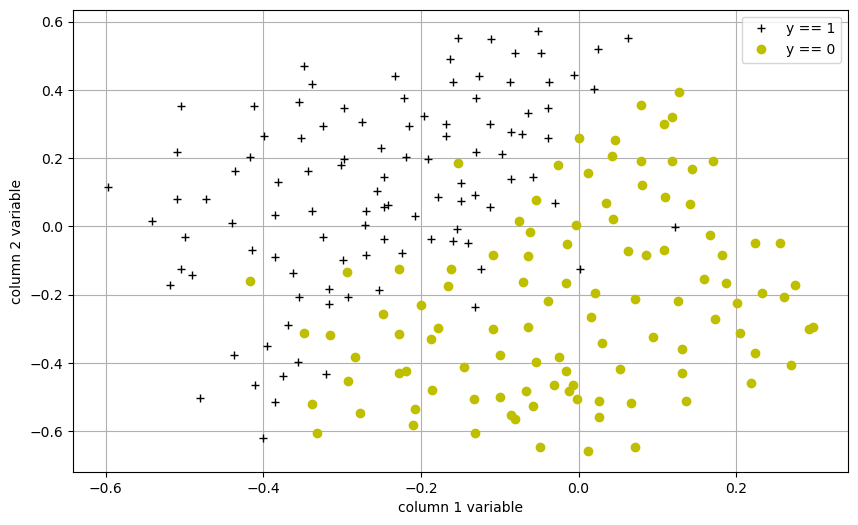

In [97]:
plotData()

In [98]:
Cvalues = (0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.)
sigmaValues = Cvalues

best_pair , best_score = (0, 0) , 0

for c in Cvalues:
    for sigma in sigmaValues:
        gamma =np.power(sigma , -2.)
        g_svm  =svm.SVC(C = c , kernel='rbf' , gamma =gamma)
        g_svm.fit(X,y.flatten())
        curr_score = g_svm.score(xvals,yvals)
        
        if curr_score > best_score:
            best_score = curr_score
            best_pair = (c , sigma)
            
print("Best c value and sigma value pair (%f,%f) for best score %f "%(best_pair[0] , best_pair[1] , best_score))



Best c value and sigma value pair (0.300000,0.100000) for best score 0.965000 


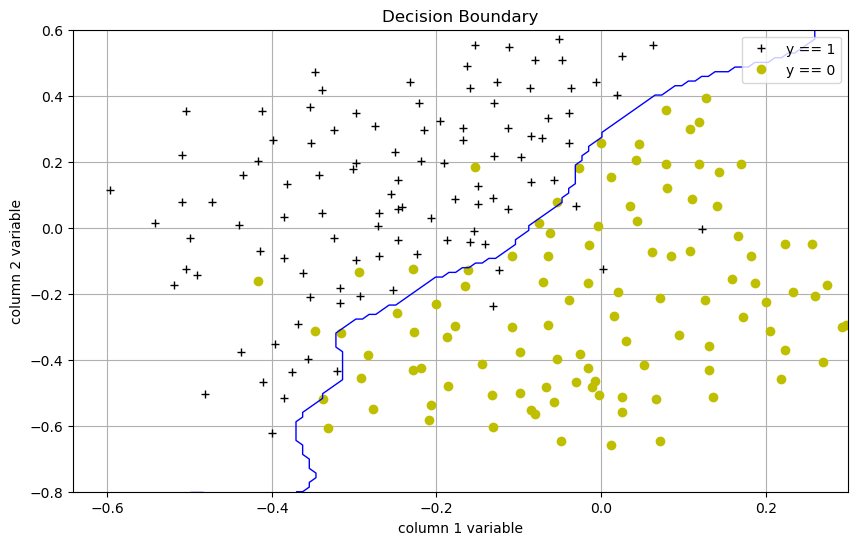

In [99]:
g_svm = svm.SVC(C = best_pair[0] , kernel = 'rbf' , gamma =np.power(best_pair[1] , -2.))
g_svm.fit(X,y.flatten())     

plotData()
plotBoundary(g_svm ,-0.5 , 0.3 , -0.8 , 0.6 )          